# Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path_folder = '/content/drive/MyDrive/S2/Semester 2/Sains Komputasi/Tugas Akhir/Revisi Terakhir/Feature_Selections/Handling_Outliers/'
path_data = '/content/drive/MyDrive/S2/Semester 2/Sains Komputasi/Tugas Akhir/'

In [ ]:
df = pd.read_csv(path_data + 'dataset.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
print("Jumlah Duplikat =", df.duplicated().sum())

Jumlah Duplikat = 33


In [ ]:
df=df.drop_duplicates()

In [1]:
df

NameError: name 'df' is not defined

In [ ]:
df = df.reset_index(drop=True)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
272,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
273,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
274,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

# Outlier Detection

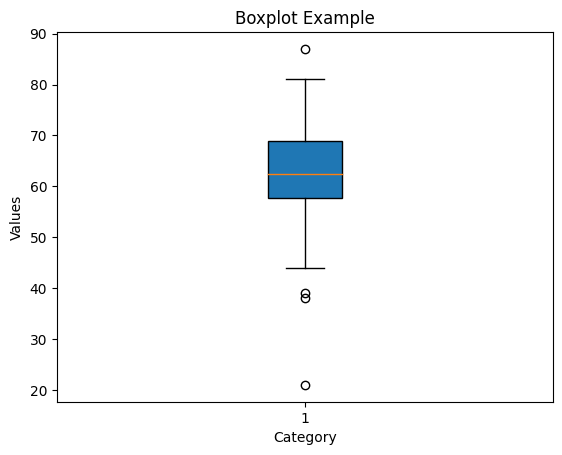

Number of outliers: 4


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
boxplot_stats = ax.boxplot(df['AGE'], patch_artist=True)

plt.title('Boxplot Example')
plt.xlabel('Category')
plt.ylabel('Values')
plt.show()

# Extract outliers from the boxplot stats
outliers = boxplot_stats['fliers'][0].get_ydata()

# Count the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers: {num_outliers}")

# IQR

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_manual = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]

# Count the number of outliers
num_outliers_manual = outliers_manual.shape[0]

print(f"Number of outliers (manual calculation): {num_outliers_manual}")
print(f"Outlier values (manual calculation): {outliers_manual['AGE'].values}")

Number of outliers (manual calculation): 4
Outlier values (manual calculation): [21 38 39 87]


## Hapus Data Outliers

In [ ]:
for handle in outliers_manual['AGE'].values:
  index_list = df[df['AGE'] == handle].index.tolist()
  umur_rata = int(df['AGE'].mean())
  for index in index_list:
      if (df.loc[index, 'LUNG_CANCER'] == 'YES' and handle < umur_rata) or (df.loc[index, 'LUNG_CANCER'] == 'NO' and handle > umur_rata):
          df.drop(index_list, inplace=True)

In [ ]:
df = df.reset_index(drop=True)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
269,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
270,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
271,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


# Encoder

In [ ]:
from sklearn import preprocessing

encoder_age = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
kategori = list(range(1, 11))

df['AGE'] = pd.cut(df['AGE'], bins=encoder_age, labels=kategori, right=True, include_lowest=True)
df['AGE'] = df['AGE'].astype(int)

le=preprocessing.LabelEncoder()

df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,7,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,8,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,6,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,7,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,7,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0,6,0,1,1,1,0,0,1,1,0,1,0,1,0,1
269,0,6,1,0,0,0,1,1,1,0,0,0,1,0,0,0
270,1,6,1,0,0,0,0,1,1,0,0,0,1,0,1,0
271,1,5,0,1,1,0,0,0,0,0,0,0,0,1,1,0


# CORRELATION

In [ ]:
#Finding Correlation
df_new = df
cn=df_new.corr()
cn

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.029483,0.030091,-0.201961,-0.157717,-0.275525,-0.181061,-0.076822,0.147866,0.118422,0.427721,0.124635,-0.050284,-0.053243,0.361427,0.045182
AGE,-0.029483,1.000000,-0.038626,0.077127,0.057473,0.044383,0.007381,0.047387,0.092095,0.100810,0.061604,0.173793,0.017643,0.014422,0.011390,0.176450
SMOKING,0.030091,-0.038626,1.000000,-0.018393,0.150481,-0.042154,-0.139922,-0.034799,-0.034315,-0.152522,-0.065315,-0.137591,0.055817,0.038217,0.104264,0.025666
YELLOW_FINGERS,-0.201961,0.077127,-0.018393,1.000000,0.559525,0.319842,0.012130,-0.096672,-0.152491,-0.063092,-0.274438,0.008365,-0.106840,0.331975,-0.104099,0.182359
ANXIETY,-0.157717,0.057473,0.150481,0.559525,1.000000,0.208761,-0.003814,-0.175135,-0.158512,-0.173226,-0.158798,-0.226853,-0.148609,0.473447,-0.122086,0.140570
PEER_PRESSURE,-0.275525,0.044383,-0.042154,0.319842,0.208761,1.000000,0.054260,0.098200,-0.071587,-0.042154,-0.145651,-0.065991,-0.213046,0.327563,-0.079530,0.189209
CHRONIC DISEASE,-0.181061,0.007381,-0.139922,0.012130,-0.003814,0.054260,1.000000,-0.102513,0.139868,-0.036841,0.021500,-0.166062,-0.014323,0.071978,-0.045197,0.155199
FATIGUE,-0.076822,0.047387,-0.034799,-0.096672,-0.175135,0.098200,-0.102513,1.000000,-0.003753,0.151479,-0.179718,0.153781,0.403455,-0.109220,0.012139,0.166994
ALLERGY,0.147866,0.092095,-0.034315,-0.152491,-0.158512,-0.071587,0.139868,-0.003753,1.000000,0.157772,0.378612,0.205105,-0.020221,-0.035464,0.237551,0.326571
WHEEZING,0.118422,0.100810,-0.152522,-0.063092,-0.173226,-0.042154,-0.036841,0.151479,0.157772,1.000000,0.260231,0.354103,0.040609,0.111897,0.133883,0.240598


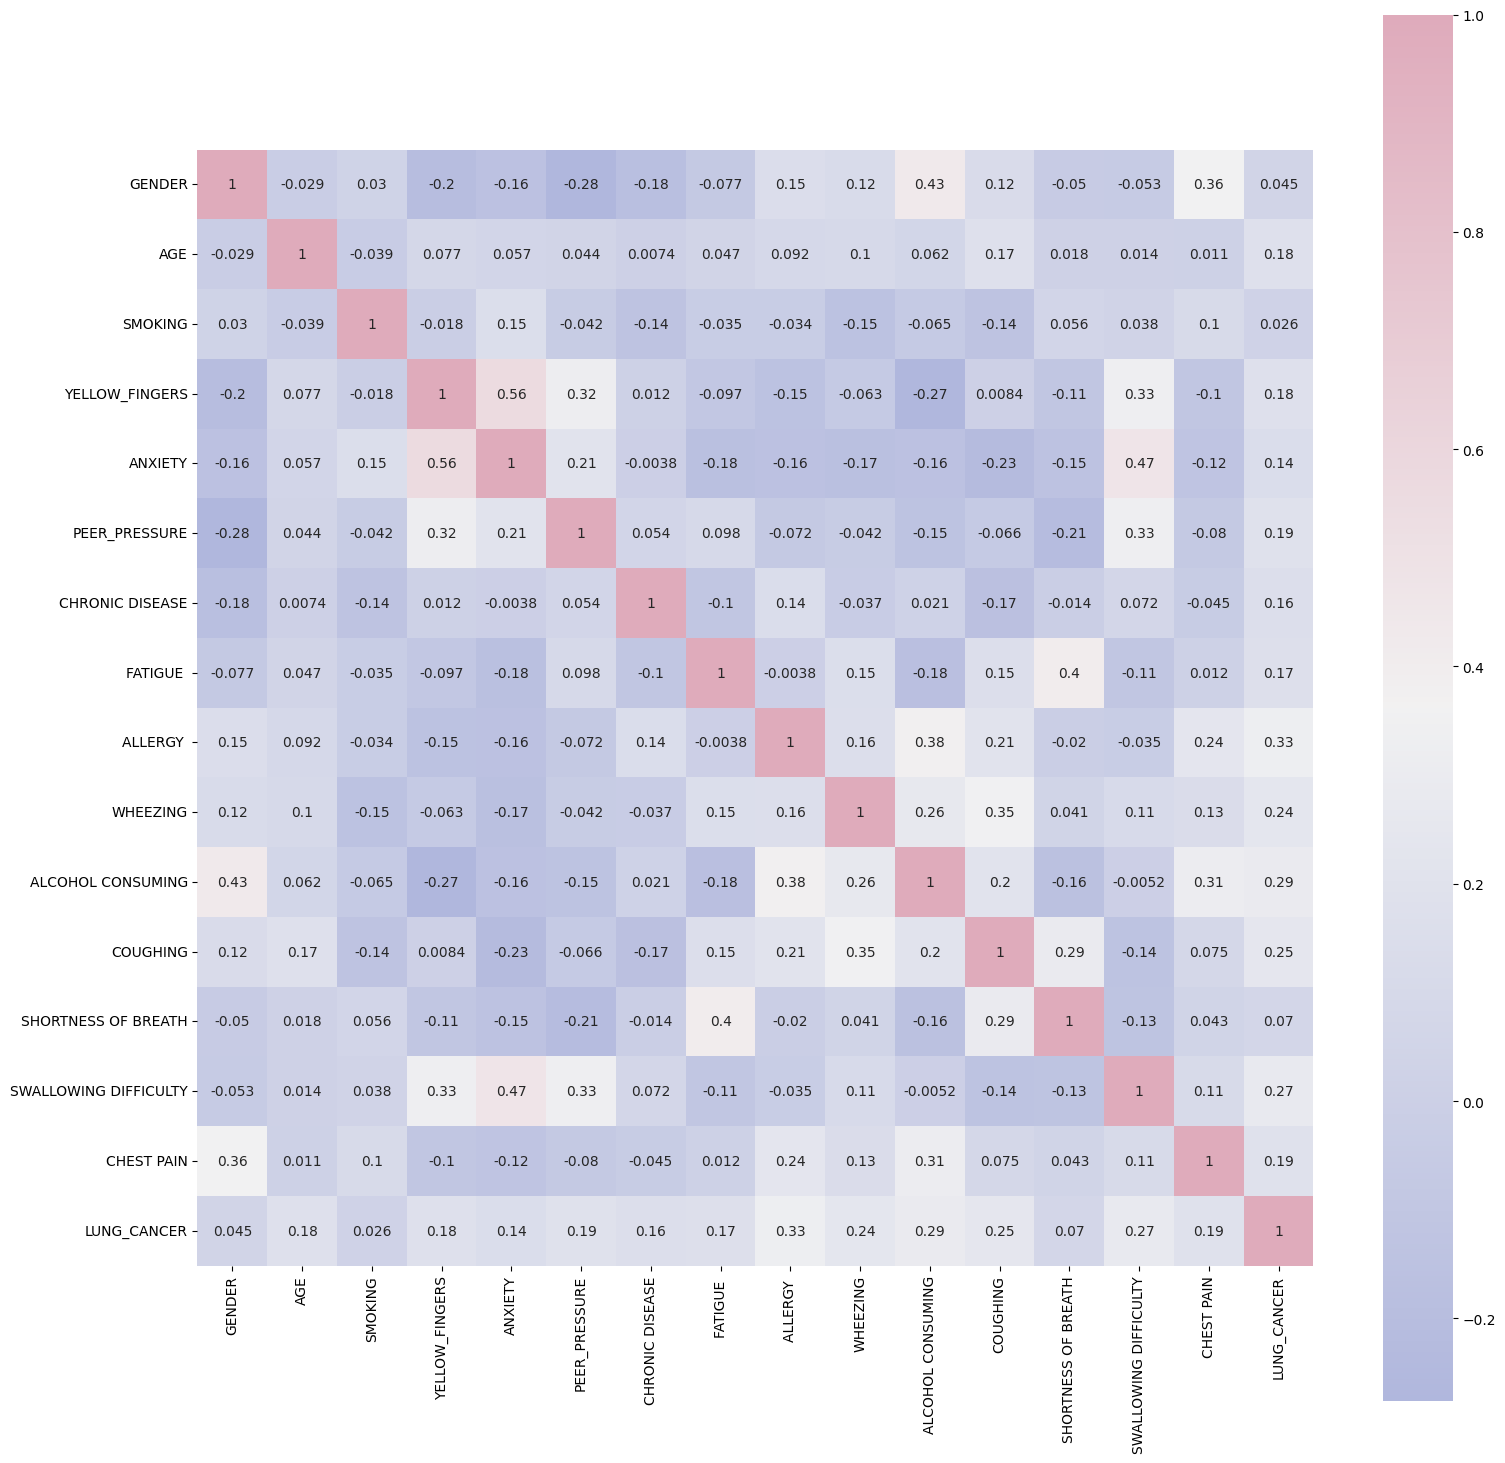

In [ ]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

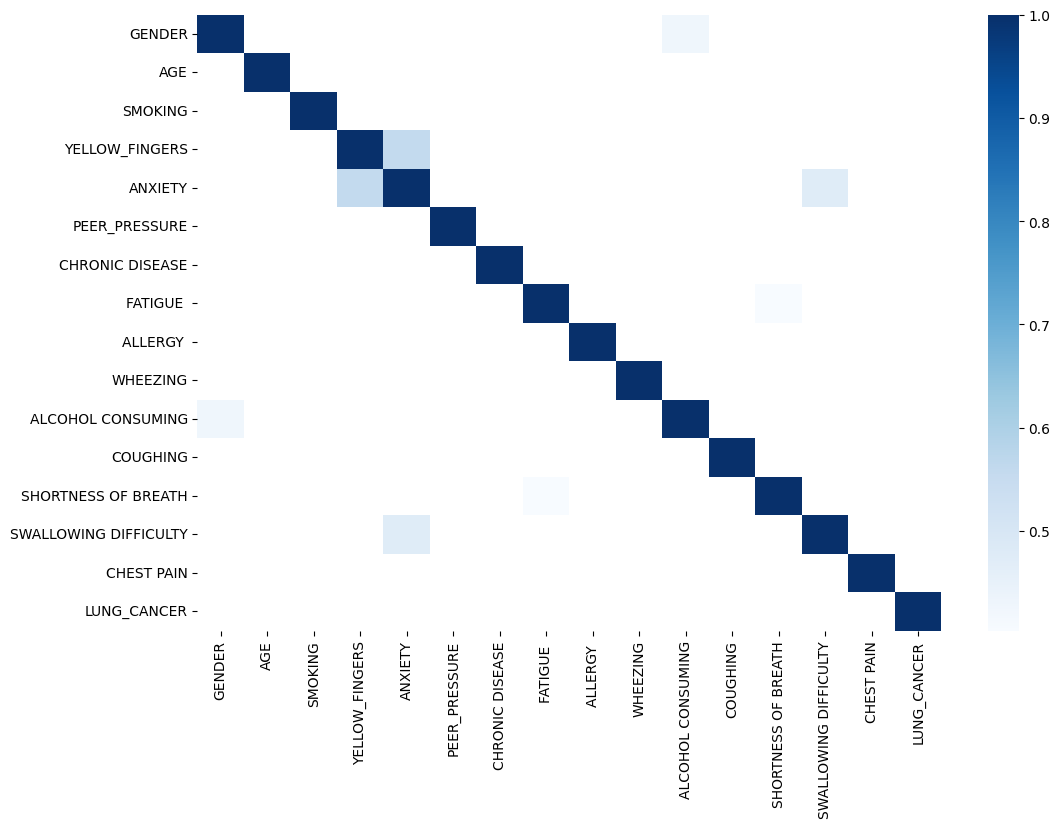

In [ ]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

#Feature Extraction

In [ ]:
margin_fitur = 0.25
target_fitur = cn["LUNG_CANCER"]
feature_extraction = target_fitur[target_fitur > margin_fitur]

print(feature_extraction)

ALLERGY                  0.326571
ALCOHOL CONSUMING        0.289835
SWALLOWING DIFFICULTY    0.267588
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64


In [ ]:
fitur_tertinggi = feature_extraction.index.tolist()
df_new = df_new[fitur_tertinggi]
df_new

,ALLERGY,ALCOHOL CONSUMING,SWALLOWING DIFFICULTY,LUNG_CANCER
0,0,1,1,1
1,1,0,1,1
2,0,0,0,0
3,0,1,1,0
4,0,0,0,0
...,...,...,...,...
268,1,0,1,1
269,1,0,0,0
270,1,0,0,0
271,0,0,1,0


##Korelasi Dataframe Terbaru

In [ ]:
new_cn = df_new.corr()

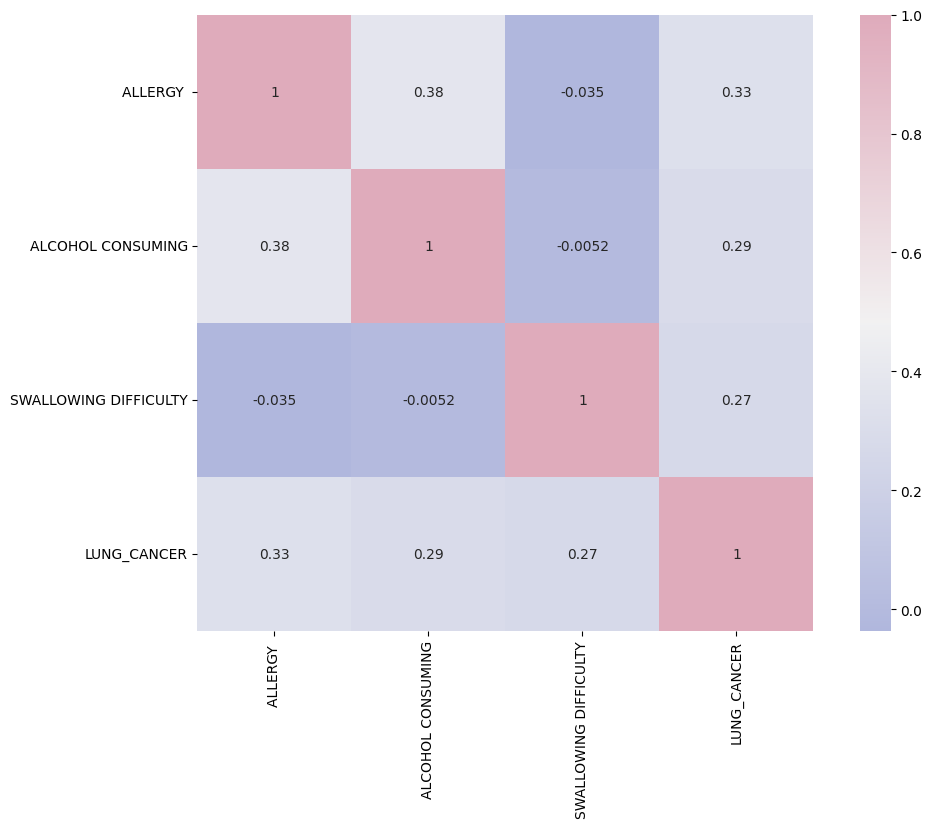

In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(new_cn, cmap=cmap, annot=True, square=True)
plt.show()

In [ ]:
for column in new_cn.columns:
    high_corr_features = new_cn[column][new_cn[column] > 0.50].drop(column)
    if not high_corr_features.empty:
        print(f"\nFitur: {column}")
        print(high_corr_features)
    else:
        print(f"\nFitur: {column} " + "= TIDAK ADA")


Fitur: ALLERGY  = TIDAK ADA

Fitur: ALCOHOL CONSUMING = TIDAK ADA

Fitur: SWALLOWING DIFFICULTY = TIDAK ADA

Fitur: LUNG_CANCER = TIDAK ADA


# Split Data

In [ ]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

#Sampling

In [ ]:
!pip install imblearn

## Random Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

random_oversampler = RandomOverSampler(random_state=42)
X, y = random_oversampler.fit_resample(X, y)

## SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X, y = smote.fit_resample(X, y)

## ADASYN

In [ ]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state=42)
# X, y = adasyn.fit_resample(X, y)

## SMOTENC

In [ ]:
# from imblearn.over_sampling import SMOTENC

# categorical_features = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 , 13, 14, 15]

# smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
# X, y = smotenc.fit_resample(X, y)

In [ ]:
# X = X.drop(columns=['AGE'])

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

# METODE

## LR

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0])

In [ ]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred, output_dict=True)
# print(lr_cr)

In [ ]:
df_lr_report = pd.DataFrame(lr_cr).transpose().round(2)
df_lr_report.index = ['LR_' + idx for idx in df_lr_report.index]

## DECICION TREE

In [ ]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0])

In [ ]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred, output_dict=True)

In [ ]:
df_dt_report = pd.DataFrame(dt_cr).transpose().round(2)
df_dt_report.index = ['DT_' + idx for idx in df_dt_report.index]

## KNN

In [ ]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0])

In [ ]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred, output_dict=True)

In [ ]:
df_knn_report = pd.DataFrame(knn_cr).transpose().round(2)
df_knn_report.index = ['KNN_' + idx for idx in df_knn_report.index]

## GNB

In [ ]:
#Fitting Gaussian Naive Bayes classifier to the training set
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0])

In [ ]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred, output_dict=True)

In [ ]:
df_gnb_report = pd.DataFrame(gnb_cr).transpose().round(2)
df_gnb_report.index = ['GNB_' + idx for idx in df_gnb_report.index]

## MNB

In [ ]:
#Fitting Multinomial Naive Bayes classifier to the training set
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred, output_dict=True)

In [ ]:
df_mnb_report = pd.DataFrame(mnb_cr).transpose().round(2)
df_mnb_report.index = ['MNB_' + idx for idx in df_mnb_report.index]

## SVM

In [ ]:
#Fitting SVC to the training set
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0])

In [ ]:
svc_cr=classification_report(y_test, y_svc_pred, output_dict=True)

In [ ]:
df_svc_report = pd.DataFrame(svc_cr).transpose().round(2)
df_svc_report.index = ['SVM_' + idx for idx in df_svc_report.index]

## RANDOM FOREST

In [ ]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0])

In [ ]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred, output_dict=True)

In [ ]:
df_rf_report = pd.DataFrame(rf_cr).transpose().round(2)
df_rf_report.index = ['RF_' + idx for idx in df_rf_report.index]

## XG BOOST

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0])

In [ ]:
#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred, output_dict=True)

In [ ]:
df_xgb_report = pd.DataFrame(xgb_cr).transpose().round(2)
df_xgb_report.index = ['XGB_' + idx for idx in df_xgb_report.index]

## MLP C

In [ ]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [ ]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0])

In [ ]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred, output_dict=True)

In [ ]:
df_mlp_report = pd.DataFrame(mlp_cr).transpose().round(2)
df_mlp_report.index = ['MLP_' + idx for idx in df_mlp_report.index]

## GB

In [ ]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0])

In [ ]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred, output_dict=True)

In [ ]:
df_gb_report = pd.DataFrame(gb_cr).transpose().round(2)
df_gb_report.index = ['GB_' + idx for idx in df_gb_report.index]

#Recap Hasil

In [ ]:
hasil_rekap = pd.concat([df_lr_report,
                         df_dt_report,
                         df_knn_report,
                         df_gnb_report,
                         df_mnb_report,
                         df_svc_report,
                         df_rf_report,
                         df_xgb_report,
                         df_mlp_report,
                         df_gb_report])
hasil_rekap

,precision,recall,f1-score,support
LR_0,0.84,0.75,0.79,51.00
LR_1,0.74,0.84,0.79,44.00
LR_accuracy,0.79,0.79,0.79,0.79
LR_macro avg,0.79,0.79,0.79,95.00
LR_weighted avg,0.80,0.79,0.79,95.00
DT_0,0.85,0.86,0.85,51.00
DT_1,0.84,0.82,0.83,44.00
DT_accuracy,0.84,0.84,0.84,0.84
DT_macro avg,0.84,0.84,0.84,95.00
DT_weighted avg,0.84,0.84,0.84,95.00


In [ ]:
hasil_rekap.to_excel('Hasil Pengujian.xlsx')

# K-FOLD

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, f1_score
import numpy as np
import pandas as pd

# Define custom scorers
precision_scorer = make_scorer(precision_score, average='macro')
f1_scorer = make_scorer(f1_score, average='macro')

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize dictionaries to store the scores
average_accuracies = {}
average_precisions = {}
average_f1_scores = {}

# Define a function to compute and store scores for a given model
def evaluate_model(model, model_name):
    accuracy_scores = cross_val_score(model, X, y, cv=kf)
    precision_scores = cross_val_score(model, X, y, cv=kf, scoring=precision_scorer)
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring=f1_scorer)

    average_accuracies[model_name] = round(np.mean(accuracy_scores), 2)
    average_precisions[model_name] = round(np.mean(precision_scores), 2)
    average_f1_scores[model_name] = round(np.mean(f1_scores), 2)

# Evaluate each model
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Gaussian Naive Bayes": gnb_model,
    "Multinomial Naive Bayes": mnb_model,
    "Support Vector Classifier": svc_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Multi-layer Perceptron": mlp_model,
    "Gradient Boost": gb_model
}

for model_name, model in models.items():
    evaluate_model(model, model_name)

# Create a DataFrame to store the results
df_accuracies = pd.DataFrame({
    'Model': average_accuracies.keys(),
    'Average Accuracy': average_accuracies.values(),
    'Average Precision': average_precisions.values(),
    'Average F1 Score': average_f1_scores.values()
})

df_accuracies

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Average Accuracy,Average Precision,Average F1 Score
0,Logistic Regression,0.79,0.79,0.78
1,Decision Tree,0.80,0.80,0.79
2,KNN,0.73,0.69,0.69
3,Gaussian Naive Bayes,0.79,0.79,0.78
4,Multinomial Naive Bayes,0.58,0.62,0.56
5,Support Vector Classifier,0.80,0.80,0.79
6,Random Forest,0.80,0.80,0.79
7,XGBoost,0.80,0.80,0.79
8,Multi-layer Perceptron,0.78,0.80,0.78
9,Gradient Boost,0.80,0.80,0.79


In [ ]:
# Print the DataFrame
df_accuracies

,Model,Average Accuracy,Average Precision,Average F1 Score
0,Logistic Regression,0.79,0.79,0.78
1,Decision Tree,0.80,0.80,0.79
2,KNN,0.73,0.69,0.69
3,Gaussian Naive Bayes,0.79,0.79,0.78
4,Multinomial Naive Bayes,0.58,0.62,0.56
5,Support Vector Classifier,0.80,0.80,0.79
6,Random Forest,0.80,0.80,0.79
7,XGBoost,0.80,0.80,0.79
8,Multi-layer Perceptron,0.78,0.80,0.78
9,Gradient Boost,0.80,0.80,0.79


In [ ]:
# Save the DataFrame to an Excel file
df_accuracies.to_excel('hasil-kFold.xlsx', index=False)

# Gambar Confuission Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import os

def get_confusion_matrix_metrics(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

def plot_confusion_matrix_kfold(model, X, y, kf, model_name, save_path):
    cm_total = np.zeros((2, 2))

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cm = get_confusion_matrix_metrics(y_test, y_pred)
        cm_total += cm

    cm_avg = cm_total / kf.get_n_splits()

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Average Confusion Matrix for {model_name}')

    # Save the plot
    file_path = os.path.join(save_path, f'{model_name}_confusion_matrix.png')
    plt.savefig(file_path)
    plt.close()

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

save_path = path_folder + f'Random/{int(margin_fitur*100)}'

# Ensure the save path exists
os.makedirs(save_path, exist_ok=True)

plot_confusion_matrix_kfold(lr_model, X, y, kf, 'Logistic Regression', save_path)
plot_confusion_matrix_kfold(dt_model, X, y, kf, 'Decision Tree', save_path)
plot_confusion_matrix_kfold(knn_model, X, y, kf, 'KNN', save_path)
plot_confusion_matrix_kfold(gnb_model, X, y, kf, 'Gaussian Naive Bayes', save_path)
plot_confusion_matrix_kfold(mnb_model, X, y, kf, 'Multinomial Naive Bayes', save_path)
plot_confusion_matrix_kfold(svc_model, X, y, kf, 'Support Vector Classifier', save_path)
plot_confusion_matrix_kfold(rf_model, X, y, kf, 'Random Forest', save_path)
plot_confusion_matrix_kfold(xgb_model, X, y, kf, 'XGBoost', save_path)
plot_confusion_matrix_kfold(mlp_model, X, y, kf, 'Multi-layer Perceptron', save_path)
plot_confusion_matrix_kfold(gb_model, X, y, kf, 'Gradient Boost', save_path)